In [2]:
!pip install -q opendatasets


**Lets View the Database**



In [32]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

od.download('https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies')
data = pd.read_csv("/content/millions-of-movies/movies.csv")
data

Skipping, found downloaded files in "./millions-of-movies" (use force=True to force download)


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722509,962463,The Trobriand Islanders of Papua New Guinea,Documentary,en,The Trobriand Islands lie off the eastern tip ...,0.600,NaN,1990-01-01,0.0,0.0,52.0,Released,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN
722510,719564,Cuilos,NaN,es,Michelle is about to bring her boyfriend home ...,0.600,Temporal Films-Les Films du Requin,2008-06-05,0.0,0.0,12.0,Released,NaN,0.000,0.0,Monserrat Fernández-Michelle Vazquez-Grettel Q...,NaN,/tHbhRLFea3BecWlCrAlEWlwEWy6.jpg,NaN,NaN
722511,951588,Bollyrobics: Dance Workout,NaN,en,Indian dance elements from well known bollywoo...,0.600,NaN,2007-09-11,0.0,0.0,103.0,Released,NaN,0.000,0.0,NaN,NaN,/pqaVLRu5V5WoJAT82RkxMKZ65Yw.jpg,NaN,NaN
722512,874303,Sloppy Jo and The Heartbreak Company,Action,ja,Japanese V-Cinema film that sought to emulate ...,0.600,NaN,1992-06-26,0.0,0.0,80.0,Released,NaN,0.000,0.0,Riki Takeuchi-Mie Yoshida-Yumiko Itaya-Keishi ...,v-cinema,/zJkgSNOd57iq7uUwCvvmacY0bXy.jpg,NaN,NaN


**Checking the results of the Movie**

In [25]:
def check_result(a,b):
  c= a/b
  data["result"]= c

def value_series(c):
    if(c>=2):
      return "Blockbuster"
    if(c>=1.5):
      return "Super Hit"
    if(c>=1):
      return "Hit"
    if(c>=0.5):
      return "flop"
    if(c==0.0):
      return "Data Unavailable"
    if(c<0.5):
      return "disaster"
    else:
      return "NAN"
check_result(data["revenue"],data["budget"])
data["result"]=data["result"].apply(value_series)

**Visualize The Results**

<Axes: xlabel='count', ylabel='result'>

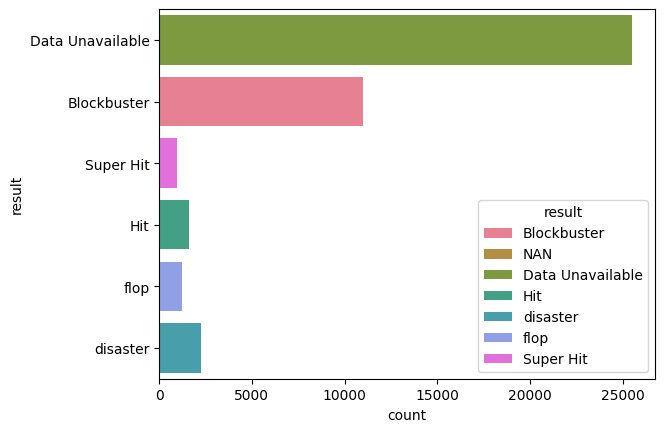

In [27]:
sns.plotting_context("talk")

sns.countplot(data=data,y="result",palette="husl",hue="result",legend=True,order=("Data Unavailable","Blockbuster","Super Hit","Hit","flop","disaster"))


**There are lot of values whose result is unavailable**

**Lets check the values whose data is unavailable**

In [33]:
data_unavailable = data[np.logical_or(data["result"]=="Data Unavailable",data["result"]=="NAN")]
data_unavailable

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations,result
9,956101,The Eighth Clause,Thriller,la,Kat and Borja appear to be a perfect couple bu...,2259.303,SDB Films-El Hombre Orquesta,2022-04-29,0.0,0.0,...,Released,NaN,4.600,10.0,Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...,NaN,/8tc8eMFAX2SDC1TRu987qFQy8Cl.jpg,/kLnqNE9Af5QHyvUxw8cDGhF1ilv.jpg,NaN,NAN
10,447277,The Little Mermaid,Adventure-Family-Fantasy-Romance,en,The youngest of King Triton’s daughters and th...,2118.742,Walt Disney Pictures-Lucamar Productions-Marc ...,2023-05-18,250000000.0,0.0,...,Released,"Watch and you'll see, some day I'll be, part o...",5.957,220.0,Halle Bailey-Jonah Hauer-King-Daveed Diggs-Awk...,musical-mermaid-based on fairy tale-live actio...,/ym1dxyOk4jFcSl4Q2zmRrA5BEEN.jpg,/hJoMSAltRx5xvlAXvKyDdugjucJ.jpg,420808-798286-447365-493529-502356-594767-6401...,Data Unavailable
15,965839,Lord of the Streets,Action,en,When Jason Dyson refuses to make his prized fi...,1691.825,Mutiny Films,2022-04-22,1000000.0,0.0,...,Released,NaN,4.900,29.0,Treach-Quinton Jackson-Khalil Rountree Jr.-And...,NaN,/n9YWVQRc0zw0nwrFcOkOpffZxjc.jpg,/g8Yytnby0hIPft5l56mgJtZyR1k.jpg,982467,Data Unavailable
17,772515,Huesera: The Bone Woman,Drama-Horror-Mystery,es,Valeria's joy at becoming a first-time mother ...,1436.445,Disruptiva Films-Machete Producciones-Maligno ...,2023-02-10,0.0,0.0,...,Released,NaN,6.580,75.0,Natalia Solián-Alfonso Dosal-Mayra Batalla-Mer...,pregnant woman-woman director,/7NhG3NClQ1xrc3kEwTiwFht5Y3L.jpg,/A2avUoNFstnBhAnHiogXQs4c9Bt.jpg,327593-631842-508108-1058949-988233-746524-646...,NAN
18,619930,Narvik,War-Drama-History-Action,no,April 1940. The eyes of the world are on Narvi...,1383.465,Nordisk Film Norway,2022-12-25,8000000.0,0.0,...,Released,Hitler's First Defeat,7.000,195.0,Kristine Cornelie M. Hartgen-Carl Martin Egges...,winter-world war ii-based on true story-bombin...,/gU4mmINWUF294Wzi8mqRvi6peMe.jpg,/ogFIG0fNXEYRQKrpnoRJcXQNX9n.jpg,458737-800815-414268-843794-606154-619687-7476...,Data Unavailable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722509,962463,The Trobriand Islanders of Papua New Guinea,Documentary,en,The Trobriand Islands lie off the eastern tip ...,0.600,NaN,1990-01-01,0.0,0.0,...,Released,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NAN
722510,719564,Cuilos,NaN,es,Michelle is about to bring her boyfriend home ...,0.600,Temporal Films-Les Films du Requin,2008-06-05,0.0,0.0,...,Released,NaN,0.000,0.0,Monserrat Fernández-Michelle Vazquez-Grettel Q...,NaN,/tHbhRLFea3BecWlCrAlEWlwEWy6.jpg,NaN,NaN,NAN
722511,951588,Bollyrobics: Dance Workout,NaN,en,Indian dance elements from well known bollywoo...,0.600,NaN,2007-09-11,0.0,0.0,...,Released,NaN,0.000,0.0,NaN,NaN,/pqaVLRu5V5WoJAT82RkxMKZ65Yw.jpg,NaN,NaN,NAN
722512,874303,Sloppy Jo and The Heartbreak Company,Action,ja,Japanese V-Cinema film that sought to emulate ...,0.600,NaN,1992-06-26,0.0,0.0,...,Released,NaN,0.000,0.0,Riki Takeuchi-Mie Yoshida-Yumiko Itaya-Keishi ...,v-cinema,/zJkgSNOd57iq7uUwCvvmacY0bXy.jpg,NaN,NaN,NAN


Lets Visualize the unavailable data

<Axes: xlabel='result', ylabel='count'>

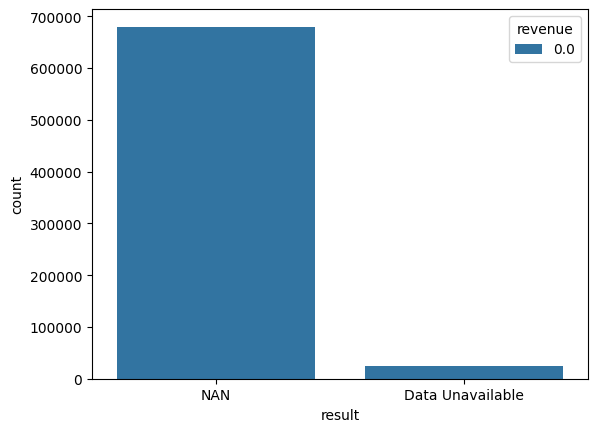

In [36]:
sns.countplot(data=data_unavailable,x="result",hue="revenue")